# PROJECT - Forest fires
- Andrej Atanasovski 112/2018

## Attribute Information:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20  - ((FWI) Fire Weather Index)
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100  - (релативна влажност)
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform).

- Number of Instances: 517 
- Number of Attributes: 12 + output attribute

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from tabulate import tabulate

In [33]:
dataset = pd.read_csv("/home/user/Software/mu/ForestFires_PROJECT_MU/forestfires.csv")
dataset

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


Немаме нулл вредности, додека пак вредностите за ден и за месец треба да ги претвориме во нумерички вредности.

In [35]:
#претварење на вредностите од object во integer
dataset.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
dataset.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [36]:
dataset.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


# Визуелизација

## Histograms

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>],
       [<AxesSubplot:title={'center':'area'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

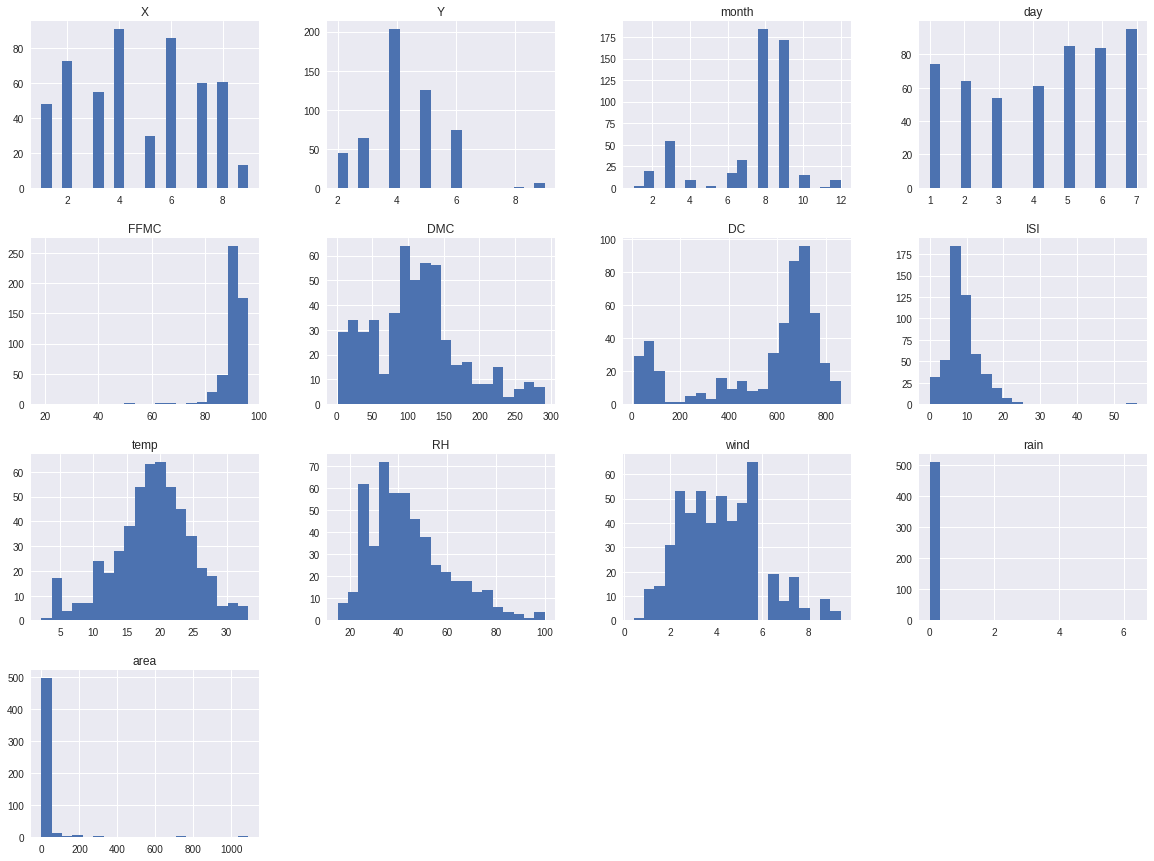

In [37]:
plt.style.use('seaborn')
dataset.hist(bins=20, figsize=(20,15))

Од хистограмите за атрибутите може да забележиме дека најголемиот дел од пожарите се случуваат најчесто во август и септември, но истакнат на хистограмот е и месец март. За време на викенд е малце поголем бројот на пожари за разлика од останатите денови. Најголем дел од пожарите се јавуваат кога температурата е околу 20 целзјусови степени, ветерот има јачина од 3-5.5 км/ч и кога нема ни малку дожд.

## Boxplots
Овде проверувам екстремни вредности

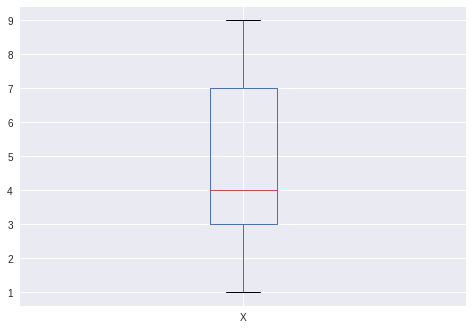

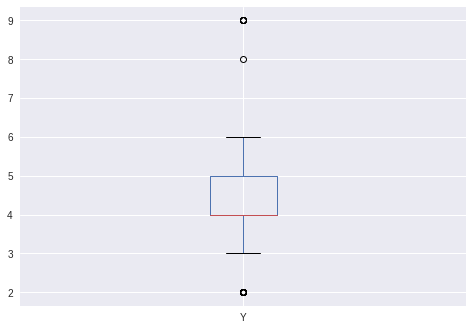

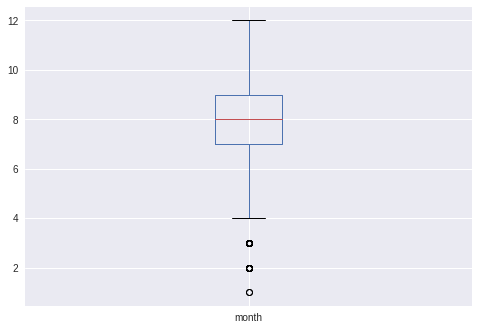

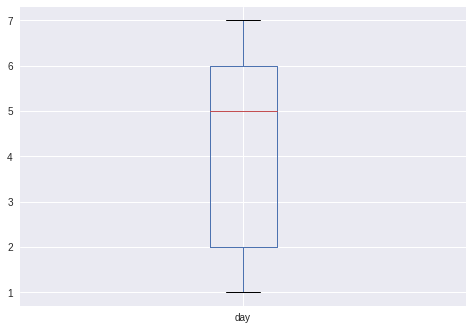

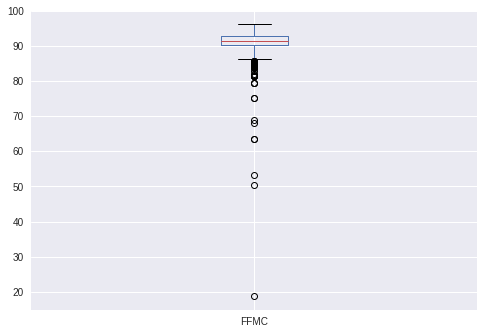

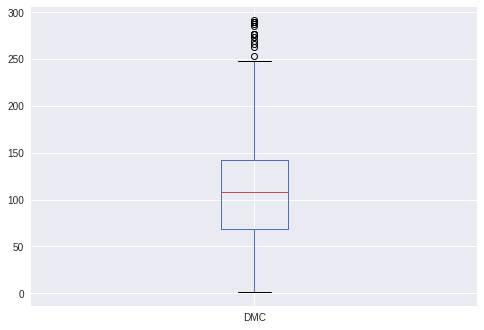

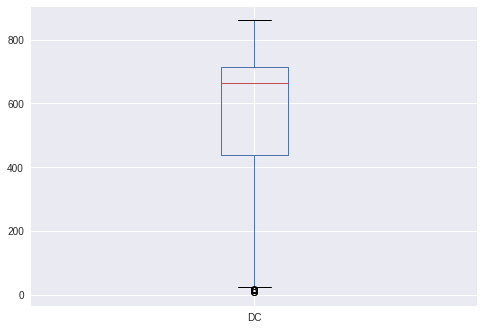

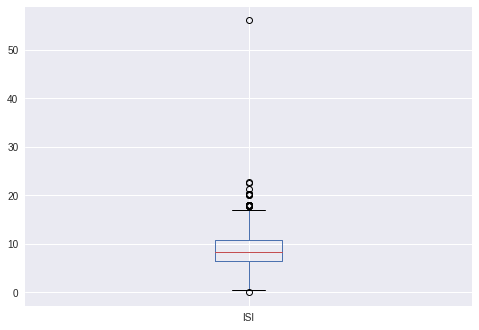

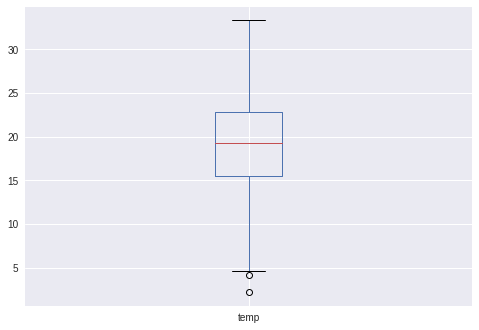

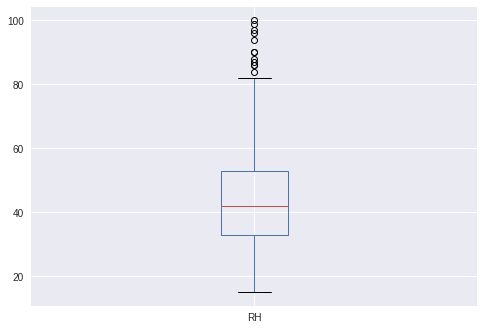

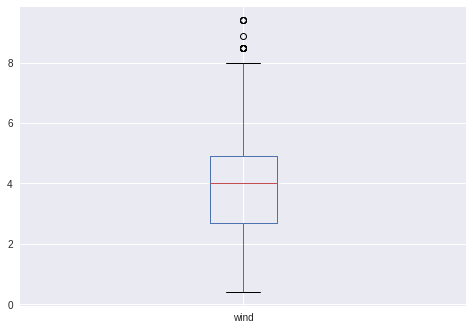

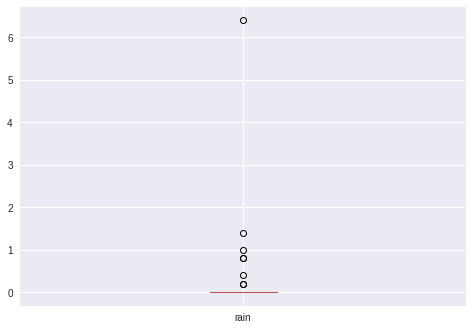

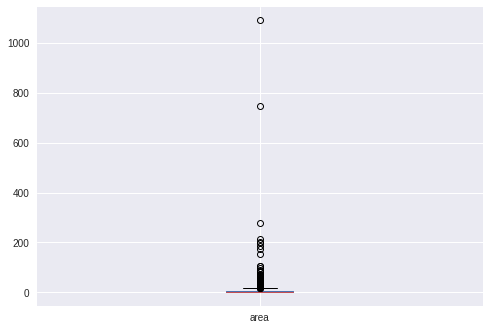

In [38]:
for i in dataset.columns:
    dataset.boxplot(column=i)
    plt.show()

Според овие boxplots можеме да видиме дека имаме некои екстремни вредности. Имаме поголемо отстапување во атрибутот rain, ISI, FFMC.

**Отстранување на екстремни вредности**
- овде го најдов- https://stackoverflow.com/questions/62366263/detect-the-outliers

In [39]:
from scipy.stats import zscore

z_scores = zscore(dataset)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
filtered_ds = dataset[filtered_entries]
filtered_ds

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
5,8,6,8,7,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,8,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


По отстранувањето на екстремните вредности на boxplots подолу може да забележиме дека онаму каде што имавме екстремни вредности се отстранети и рангот на вредностите е намален.

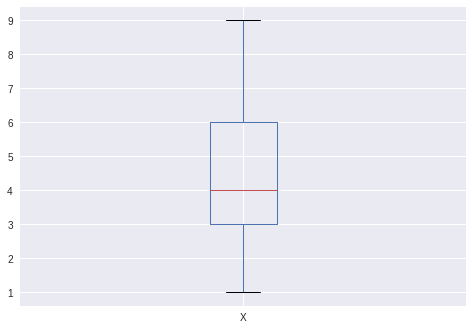

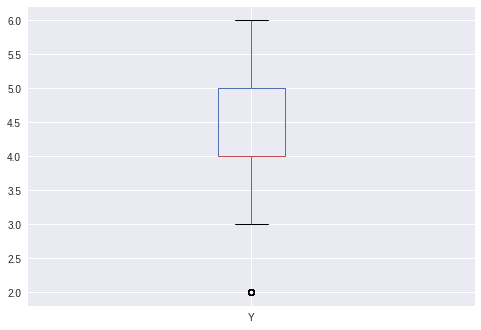

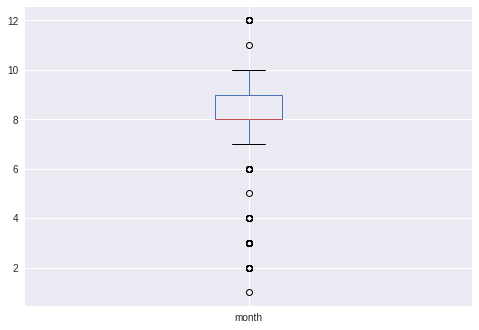

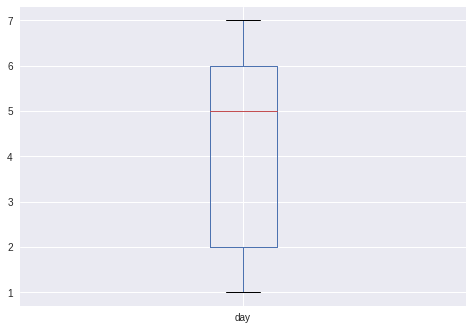

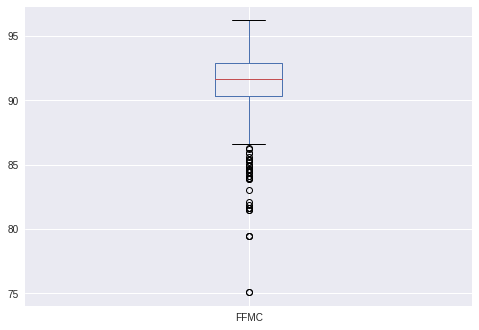

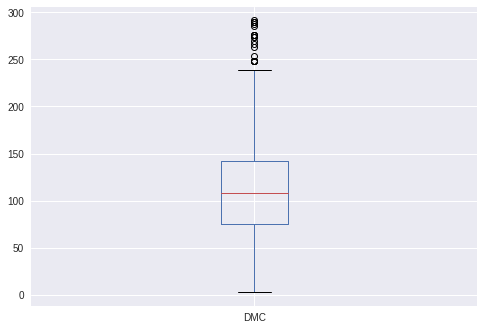

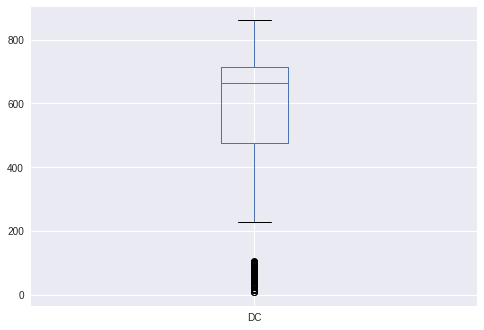

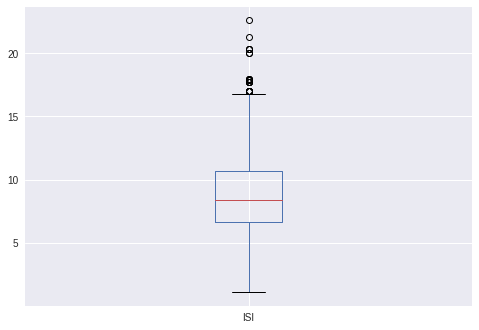

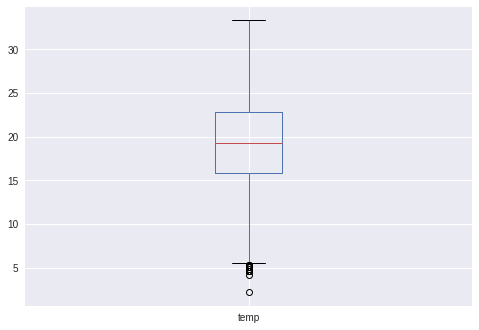

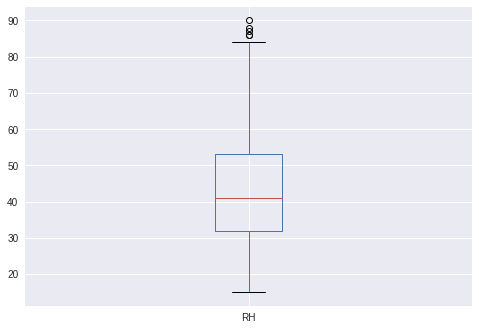

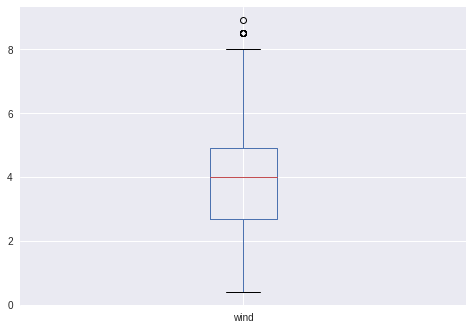

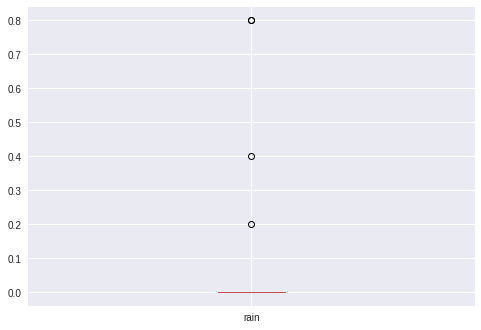

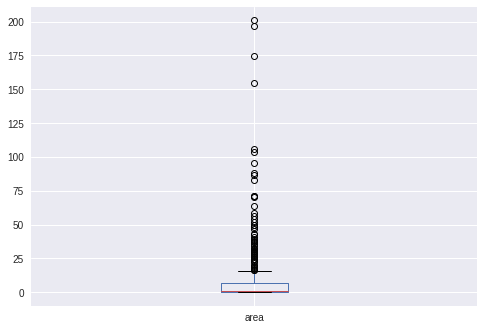

In [40]:
for i in filtered_ds.columns:
    filtered_ds.boxplot(column=i)
    plt.show()

In [41]:
from scipy.stats import shapiro
response = dataset['area']
shapiro(response)[1]

1.3438452272874996e-42

Од визуелизацијата може да видиме дека излезната променлива 'area' е right skewed распределена. Р вредноста може да видиме дека е многу помала од 0.05. За да го решиме овој проблем, ќе применам неколку трансформации, врз оваа променлива и ќе ја одберам онаа која ќе има најдобра распределба. Трансофмрации кои ќе ги применам се: sqrt(x) и log(x).
- Ќе ја одберам логаритамската трансформација. Таа се користи за нормализирање на skewed распределба.

**Square Root Transformation**

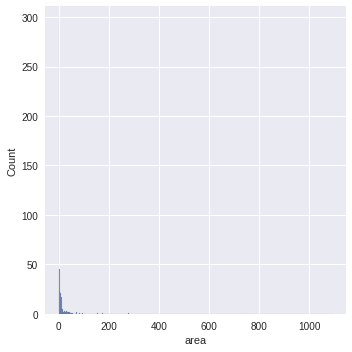

In [42]:
sns.displot(response)

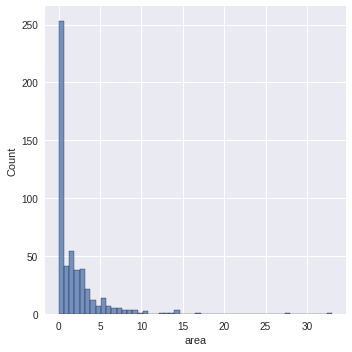

In [43]:
sqrt_resp = response**(.5)
sns.displot(sqrt_resp)

**Log Transformation**

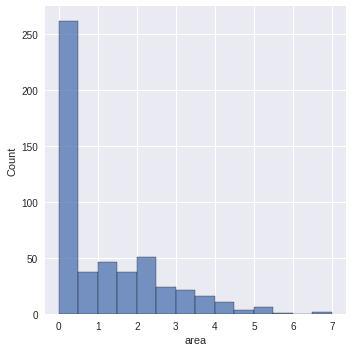

In [44]:
log_resp = np.log(response + 1)
sns.displot(log_resp)

In [45]:
trans_ds = dataset.copy()
trans_ds['area'] = log_resp
trans_ds

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000000
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000000
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000000
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.000000
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000


# Feature Selection

Прво ќе креирам модел со сите атрибути за да можам потоа да ги споредувам моделите со селектираните атрибути.

In [46]:
x = trans_ds[["X", "Y", "month", "day", "FFMC", "DMC", "DC","ISI", "temp", "RH", "wind", "rain"]].to_numpy()
y = trans_ds[["area"]].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

In [47]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

Text(0.5, 1.0, 'Model with all the attributes')

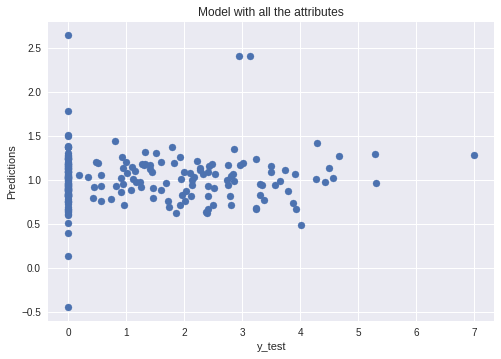

In [48]:
predictions = lm.predict(x_test)
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.title('Model with all the attributes')

In [49]:
lm1 = metrics.mean_squared_error(y_test, predictions)
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MSE: 2.194759174231693


Но од scatterplot-от претпоставувам дека моделот само со intercept би давал најдобри резултати.

## Heatmap со трансформиран излез

<AxesSubplot:>

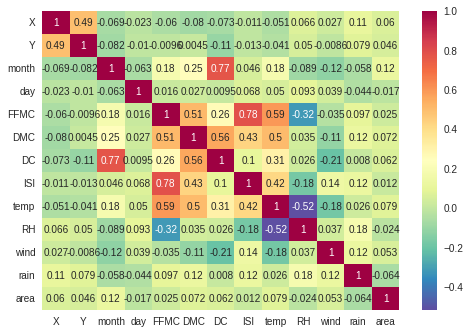

In [50]:
cormat = trans_ds.corr(method="spearman")
sns.heatmap(cormat, cmap='Spectral_r', annot=True)

Може да видиме дека има некоја монотона врска меѓу некои од атрибутите, како што се DC и month, ISI и FFMC кои би можело да влијаат врз излезот на регресија. Кога правиме модел на регресија сакаме да немаме многу меѓусебно корелирани променливи, но сакаме да имаат корелираност со излезот.

In [57]:
abs(trans_ds.corr()['area']) # гледаме корелација со излезот

X        0.061995
Y        0.038838
month    0.114280
day      0.000208
FFMC     0.046799
DMC      0.067153
DC       0.066360
ISI      0.010347
temp     0.053487
RH       0.053662
wind     0.066973
rain     0.023311
area     1.000000
Name: area, dtype: float64

In [96]:
feat_to_drop = ['X', 'Y', 'day', 'FFMC', 'DC', 'ISI', 'temp', 'RH', 'rain'] # отстранувам се под 0.67 (со проба)
reduced_dataset = trans_ds.copy()
reduced_dataset = reduced_dataset.drop(columns=feat_to_drop)
reduced_dataset

,month,DMC,wind,area
0,3,26.2,6.7,0.000000
1,10,35.4,0.9,0.000000
2,10,43.7,1.3,0.000000
3,3,33.3,4.0,0.000000
4,3,51.3,1.8,0.000000
...,...,...,...,...
512,8,56.7,2.7,2.006871
513,8,56.7,5.8,4.012592
514,8,56.7,6.7,2.498152
515,8,146.0,4.0,0.000000


## Регресионен модел со селектирани вредности

In [74]:
xr = reduced_dataset[["month", "DMC", "wind"]].to_numpy()
yr = reduced_dataset[["area"]].to_numpy()
xr_train, xr_test, yr_train, yr_test = train_test_split(xr, yr, test_size=0.4, random_state=0)

Text(0.5, 1.0, 'Linear Regression model with selected attributes (month, DMC, wind)')

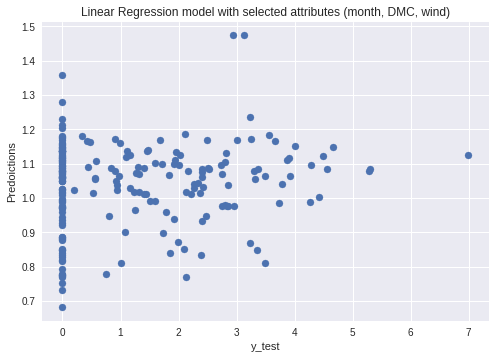

In [75]:
lm2 = LinearRegression()
lm2.fit(xr_train,yr_train)
predictions2 = lm2.predict(xr_test)
plt.scatter(yr_test,predictions2)
plt.xlabel('y_test')
plt.ylabel('Predoictions')
plt.title('Linear Regression model with selected attributes (month, DMC, wind)')

In [76]:
lm2 = metrics.mean_squared_error(yr_test, predictions2)
print('MSE for model with filtered data:', metrics.mean_squared_error(yr_test, predictions2))

MSE for model with filtered data: 2.1179256132676114


Немаме значајно подобрување на средно квадратната грешка за моделот.

## Lasso Regression

In [77]:
from sklearn.linear_model import Lasso

Text(0.5, 1.0, 'Lasso Regression model with all the attributes')

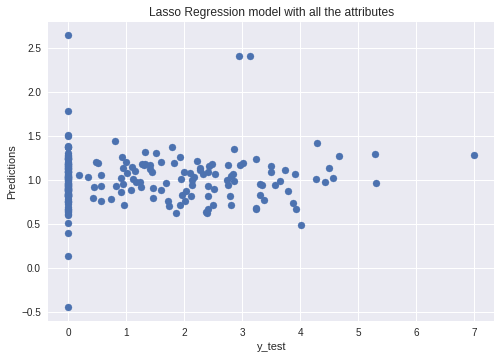

In [78]:
lasso = Lasso(alpha=0.0001)
lasso.fit(x_train, y_train);

lasso_pred = lasso.predict(x_test)
plt.scatter(y_test,lasso_pred)
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.title('Lasso Regression model with all the attributes')

In [79]:
ls1 = metrics.mean_squared_error(y_test, lasso_pred)
print('MSE for Lasso:', metrics.mean_squared_error(y_test, lasso_pred))

MSE for Lasso: 2.194615786245716


Немаме значајно подобрување на средно квадратната грешка за моделот.

### Lasso Regression со селектирани атрибути

Text(0.5, 1.0, 'Lasso Regression model with selected attributes (month, DMC, wind)')

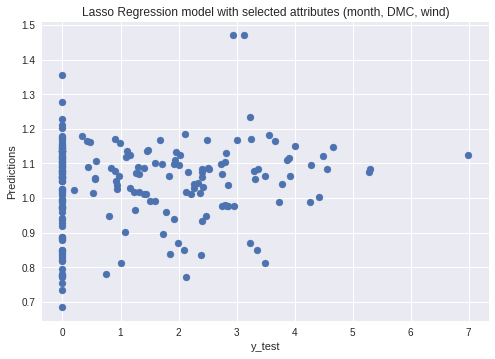

In [80]:
lasso2 = Lasso(alpha=0.001)
lasso2.fit(xr_train, yr_train);

lasso_pred2 = lasso2.predict(xr_test)
plt.scatter(yr_test,lasso_pred2)
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.title('Lasso Regression model with selected attributes (month, DMC, wind)')

In [81]:
ls2 = metrics.mean_squared_error(yr_test, lasso_pred2)
print('MSE for Lasso model with selected attributes:', metrics.mean_squared_error(yr_test, lasso_pred2))

MSE for Lasso model with selected attributes: 2.1181903175932955


Немаме значајно подобрување на средно квадратната грешка за моделот.

# Ridge Regression

In [82]:
from sklearn.linear_model import Ridge

Text(0.5, 1.0, 'Ridge Regression model with all the attributes')

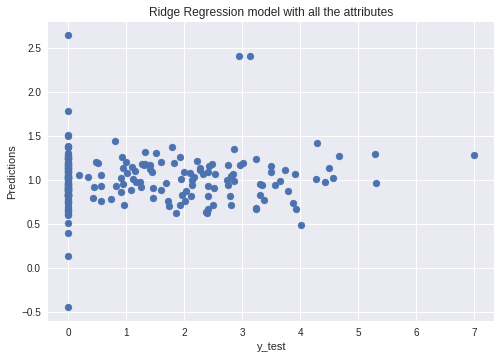

In [83]:
ridge = Ridge(alpha=0.01)
ridge.fit(x_train, y_train);

ridge_pred = ridge.predict(x_test)
plt.scatter(y_test,ridge_pred)
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.title('Ridge Regression model with all the attributes')

In [84]:
r1 = metrics.mean_squared_error(y_test, ridge_pred)
print('MSE for Ridge:', metrics.mean_squared_error(y_test, ridge_pred))

MSE for Ridge: 2.1947530898115732


Немаме значајно подобрување на средно квадратната грешка за моделот.

### Ridge Regression со селектирани атрибути

Text(0.5, 1.0, 'Lasso Regression model with selected attributes (month, DMC, wind)')

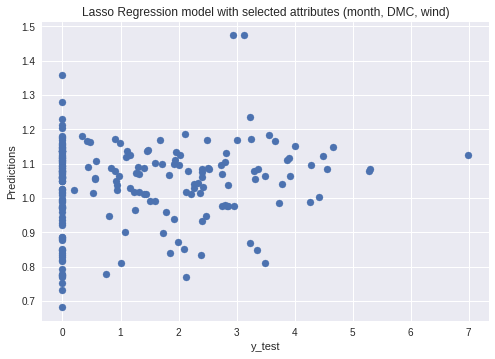

In [85]:
ridge2 = Ridge(alpha=0.01)
ridge2.fit(xr_train, yr_train);

ridge_pred2 = ridge2.predict(xr_test)
plt.scatter(yr_test,ridge_pred2)
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.title('Lasso Regression model with selected attributes (month, DMC, wind)')

In [86]:
r2 = metrics.mean_squared_error(yr_test, ridge_pred2)
print('MSE for Ridge with selected attributes:', metrics.mean_squared_error(yr_test, ridge_pred2))

MSE for Ridge with selected attributes: 2.117925844601602


Немаме значајно подобрување на средно квадратната грешка за моделот.

### Многу слични резултати добиваме со Linear, со Ridge и Lasso Regression, со и без селектираните атрибути. Малку MSE е подобро со селектираните вредности, но не е голема разликата.

Text(0.5, 1.0, 'Linear Regression')

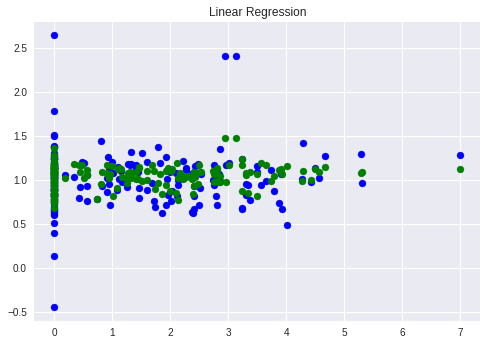

In [95]:
fig1 = plt.figure()
plt.scatter(y_test, predictions, color='blue')
plt.scatter(yr_test, predictions2, color='green')
plt.title('Linear Regression')

Text(0.5, 1.0, 'Lasso Regression')

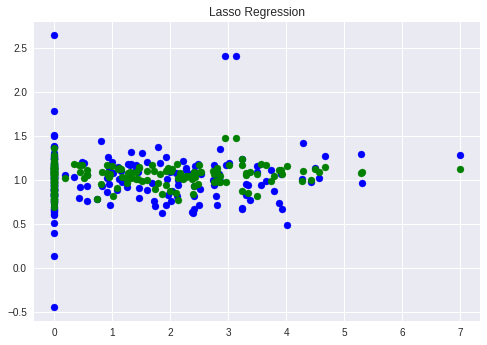

In [92]:
fig2 = plt.figure()
plt.scatter(y_test, lasso_pred, color='blue')
plt.scatter(yr_test, lasso_pred2, color='green')
plt.title('Lasso Regression')

Text(0.5, 1.0, 'Ridge Regression')

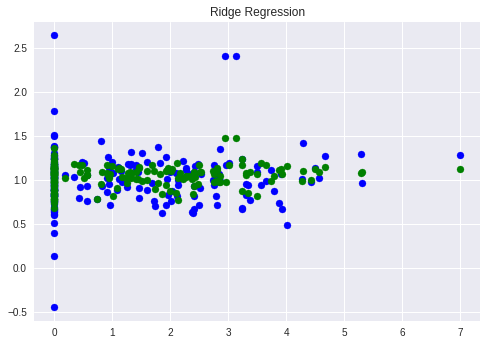

In [93]:
fig3 = plt.figure()
plt.scatter(y_test,ridge_pred, color='blue')
plt.scatter(yr_test,ridge_pred2, color='green')
plt.title('Ridge Regression')

## Споредба на MSE(mean squared error):

### Models with all the attributes

In [90]:
table1 = [["lm1", lm1],
          ["ls1", ls1],
          ["r1", r1]]

col_names = ["Model", "Regression"]

print(tabulate(table1, headers=col_names, tablefmt="fancy_grid", showindex="always"))

╒════╤═════════╤══════════════╕
│    │ Model   │   Regression │
╞════╪═════════╪══════════════╡
│  0 │ lm1     │      2.19476 │
├────┼─────────┼──────────────┤
│  1 │ ls1     │      2.19462 │
├────┼─────────┼──────────────┤
│  2 │ r1      │      2.19475 │
╘════╧═════════╧══════════════╛


### Models with selected attributes (month, DMC, wind):

In [51]:
table2 = [["lm2", lm2],
          ["ls2", ls2],
          ["r2", r2]]

col_names = ["Model", "Regression"]

print(tabulate(table2, headers=col_names, tablefmt="fancy_grid", showindex="always"))

╒════╤═════════╤══════════════╕
│    │ Model   │   Regression │
╞════╪═════════╪══════════════╡
│  0 │ lm2     │      2.11793 │
├────┼─────────┼──────────────┤
│  1 │ ls2     │      2.11819 │
├────┼─────────┼──────────────┤
│  2 │ r2      │      2.11793 │
╘════╧═════════╧══════════════╛


Како што е напишано претходно, многу слични резултати добиваме со Linear, со Ridge и Lasso Regression, со и без селектираните атрибути.